In [1]:
%matplotlib inline
import os
import json
import numpy as np
import torch
import torchvision
from PIL import Image
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l
data_iter='../dataset/pikachu'
assert os.path.exists(os.path.join(data_iter,"train"))

In [16]:
class PikachuDetDataset(torch.utils.data.Dataset):
    def __init__(self,data_dir,part,image_size=(256,256)):
        assert part in ["train","val"]
        self.image_size=image_size
        self.image_dir=os.path.join(data_iter,part,"images")
        with open(os.path.join(data_iter,part,"label.json")) as f:
            self.label=json.load(f)
        self.transform=torchvision.transforms.Compose([
            torchvision.transforms.ToTensor()])
        
    def __len__(self):
        return len(self.label)
    
    def __getitem__(self,index):
        image_path=str(index+1)+".png"
        print(index,'**********')
        cls=self.label[image_path]["class"]
        label=np.array([cls]+self.label[image_path]["loc"],dtype="float32")[None,:]
        
        PIL_img = Image.open(os.path.join(self.image_dir, image_path)
                            ).convert('RGB').resize(self.image_size)
        img=self.transform(PIL_img)
        
        sample={
            "label":label,
            "image":img
        }
        return sample

In [23]:
def load_data_pikachu(batch_size,edge_size=256,data_dir='../dataset/pikachu'):
    image_size=(edge_size,edge_size)
    train_dataset=PikachuDetDataset(data_dir,'train',image_size)
    val_dataset=PikachuDetDataset(data_dir,'val',image_size)
    train_iter=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,
                                          shuffle=True,num_workers=0)
    val_iter=torch.utils.data.DataLoader(val_dataset,batch_size=batch_size,
                                        shuffle=True,num_workers=0)
    return train_iter,val_iter

In [24]:
batch_size,edge_size=32,256
train_iter,_=load_data_pikachu(batch_size,edge_size,data_iter)
batch=iter(train_iter).next()
print(batch["image"].shape,batch["label"].shape)

torch.Size([32, 3, 256, 256]) torch.Size([32, 1, 5])


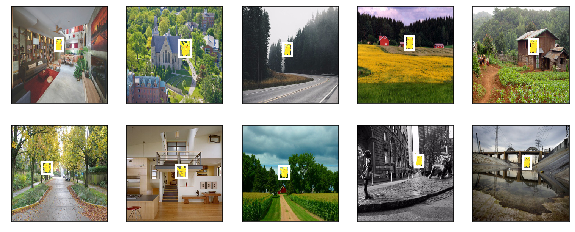

In [25]:
imgs=batch["image"][0:10].permute(0,2,3,1)
bboxes=batch["label"][0:10,0,1:]
axes=d2l.show_images(imgs,2,5).flatten()
for ax,bb in zip(axes,bboxes):
    d2l.show_bboxes(ax,[bb*edge_size],colors=['w'])